In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Prepare the data
X = df.drop(['CLASS', 'Unnamed: 0'], axis=1)  # Adjust based on your dataset's column names
y = df['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()

parameters = {'penalty':('l1', 'l2', 'elastic'),
              'C':(0.2, 0.5, 0.75, 1.0),
              'max_iter':(750, 1000, 1500, 2000),
              'multi_class':('auto', 'multinomial')
              }

gs_lr = GridSearchCV(lr, parameters)

gs_lr.fit(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (0.2, 0.5, 0.75, 1.0),
                         'max_iter': (750, 1000, 1500, 2000),
                         'multi_class': ('auto', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elastic')})

In [ ]:
# Predict and evaluate
y_pred_lr = gs_lr.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_pred_lr)

Accuracy: 0.9523809523809523
Confusion Matrix:


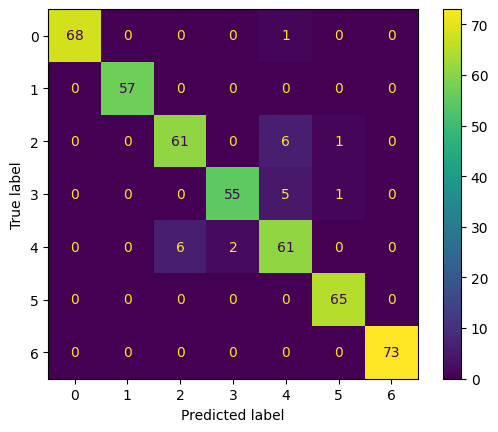

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")

confusion_matrix = confusion_matrix(y_test_encoded, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_lr, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_lr, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.9544465334261847
F1 Score: 0.9532301768410242
